In [ ]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt

path_data = 'MyDrive/Colab Notebooks/data/DataMiningProject/Preprocessed/'
path_mount = '/content/drive/'

In [ ]:
from google.colab import drive
drive.mount(path_mount)

Mounted at /content/drive/


# Paziente S5 - dati unbalanced (88% vs 12%)

## Definizione dei Dataset

In [ ]:
subject = "S5"
file_path = os.path.join(path_mount, path_data, subject)
df = pd.read_json(file_path + "_eeg.json")
df.head()

,epoch,condition,Fz,C3,Cz,C4,Pz,PO7,Oz,PO8
0,0,0,"[-7.9137207048, -6.7115646017, -5.1825172978, ...","[-16.6417906005, -16.5395399604, -16.325972964...","[-1.7510903839, -1.9711542184000002, -1.841031...","[1.5714504808, 1.8936361468, 2.6940791592, 3.7...","[1.9577952062000001, 1.6102082850000001, 1.498...","[13.0587794519, 13.3011485968, 12.4330173401, ...","[2.8437658208, 1.7859143004, 0.5888155235, -0....","[6.8748107295, 6.6313514516000005, 6.134937979..."
1,1,0,"[-6.5381892613, -6.1767740348, -5.6766263277, ...","[-10.9988267624, -10.5757850937, -9.8443950276...","[10.9698486886, 10.6657284011, 10.0413151193, ...","[-2.7210203089, -2.4830973093, -2.1169861167, ...","[-6.6796987356, -6.4386378639, -6.5810583949, ...","[32.4095520372, 32.1201558189, 32.0650265553, ...","[-8.622124317699999, -9.1261611628, -9.5127916...","[-7.8195413399, -7.9854287555, -8.374484148, -..."
2,2,0,"[2.3008548089, 3.0524494589, 3.3002685395, 2.9...","[6.1204718757, 5.8551879385, 5.6941822433, 5.8...","[0.7679714594, 2.4893904475, 3.2014265881, 2.8...","[0.11354003800000001, 0.1827539231, 0.26455571...","[-5.4935107438, -6.3341241567, -6.9299129429, ...","[5.3767406945000005, 4.3383210495, 3.774492729...","[-3.9575191456, -4.4777440745, -4.4775553361, ...","[-5.2285489872, -5.1062345863, -4.8274575388, ..."
3,3,0,"[-6.5123645089, -6.449506852, -6.6069026832999...","[7.6622295831, 7.8892195255, 7.8514884757, 7.6...","[-13.8943628494, -13.0360602682, -11.710467357...","[2.8761174536, 3.0338441133, 3.3595081626, 3.8...","[2.3561522543, 2.6634175862, 2.5850125105, 2.2...","[4.4699778877, 2.4836119099, 0.575530544400000...","[3.5411632599000002, 3.4534209198, 3.476319432...","[-0.49891308030000003, -0.0379469346, 0.469510..."
4,4,1,"[-5.2790688922, -4.5175047048, -3.272867472599...","[9.2124941214, 9.4273740476, 9.6256939258, 9.8...","[-1.3519874159, -0.09756639730000001, 1.486708...","[-2.1312577916, -0.6186457745, 0.5941403624, 1...","[2.4070970756, 2.2575817958, 2.400545181, 2.83...","[-8.0282408052, -10.196798496, -12.848705652, ...","[4.4630383767, 3.2816580635, 1.9442362465, 0.8...","[0.7079253312, 0.4639014657, 0.070248803, -0.4..."


*Costruzione matrice della features*

`X` è la matrice delle *features* di dimensione 1200 x 2808 in cui vengono salvati i dati dopo essere stati standardizzati. In `y` sono inserite le *label* dei dati.

In [ ]:
unicorn_channels = ["Fz", "C3", "Cz", "C4", "Pz", "PO7", "Oz", "PO8"]
pot = df[unicorn_channels].to_numpy()

s = np.zeros(1)
X = np.zeros(2808)

for i in range(pot.shape[0]):
  for j in range(pot.shape[1]):
    temp = np.array(pot[i,j])
    temp = (temp - np.mean(temp)) / np.std(temp)

    s = np.append(s, temp)

  X = np.vstack((X, s[1:]))
  s = np.zeros(1)

y = df.condition.to_numpy()

In [ ]:
X = X[1:,:]
X.shape

(1115, 2808)

In [ ]:
y.shape

(1115,)

*Suddivisione dei dati tra set di training, set di validazione e set di test*

Il dataset viene suddiviso in:


*   `X_train` e `y_train`: dataset di training;
*   `X_test` e `y_test`: dataset di test contenente il 20% dei dati originali;
*   `X_val` e `y_val`: dataset di test di validazione, che contiene il 20% dei dati di training.


In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter

# Suddivisione del dataset in set di training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Suddivisione del dataset in set di training e validazione
X_train_original, X_val, y_train_original, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42, stratify = y_train)

In [ ]:
X_train = X_train_original
y_train = y_train_original

Il dataset di training risulta essere fortemente sbilanciato: i dati con label *Non-Target* (NT) sono superiori di quelli *Target* (T).

In [ ]:
class_counter = Counter(y_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  87.51753155680224 % e quella di T è 12.48246844319776 %. E in termini assoluti: Counter({0: 624, 1: 89})


## **Model selection**

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

La fase di *model selection* è strutturata come segue:


1.   Ogni modello è allenato con il dataset di training;
2.   Si stima il `roc_auc` score su *10 Fold Cross Validation*;
3.   Si utilizza `grid_search` per individuare gli iperparametri che consentono di ottimizzare il modello;
4.   Si valutano le prestazioni del *best model* con diversi score e si produce la *Confusion Matrix*.



Gli score utillizati in questa sezione sono:


*   **ROC AUC** (Receiver Operating Characteristic Area Under the Curve): la curva ROC rappresenta la relazione tra il tasso di veri positivi (True Positive Rate, TPR) e il tasso di falsi positivi (False Positive Rate, FPR) al variare della soglia di classificazione. L'area sotto la curva ROC (AUC) fornisce una stima complessiva delle prestazioni del classificatore, dove un valore più vicino a 1 indica una migliore capacità di classificazione.

*   **Accuracy** (Accuratezza): è una misura della percentuale di previsioni corrette rispetto al numero totale di previsioni. È un indicatore generale delle prestazioni del classificatore, calcolato come il rapporto tra il numero di previsioni corrette e il numero totale di campioni.

*   **F1-score**: combina la precisione e il richiamo (recall) del classificatore. È utile quando ci interessa un equilibrio tra precisione e richiamo. L'F1-score è il valore medio armonico di precisione e richiamo ed è calcolato come: 2 * (precision * recall) / (precision + recall). Assume valori compresi tra 0 e 1, dove 1 indica il miglior punteggio possibile.

*   **Precision** (Precisione): la proporzione di istanze positive correttamente identificate rispetto a tutte le istanze identificate come positive dal classificatore. È calcolata come il rapporto tra i veri positivi e la somma dei veri positivi e dei falsi positivi.

*   **Recall** (Richiamo): la proporzione di istanze positive correttamente identificate rispetto al numero totale di istanze positive effettive. È calcolato come il rapporto tra i veri positivi e la somma dei veri positivi e dei falsi negativi.




La *Confusion Matrix* è una matrice 2 x 2, dove le righe rappresentano le etichette di classe reali e le colonne rappresentano le previsioni del modello. Gli scenari possibili sono quattro: True Positive (TP), False Negative (FN), True negative (TN) e False positive (FP).

Ecco un esempio di com'è strutturata una confusion matrix:


```
               | Predetto Positivo | Predetto Negativo |
-------------------------------------------------------
Vero Positivo  |       TP          |       FN          |
-------------------------------------------------------
Vero Negativo  |       FP          |       TN          |
```
Se il modello funziona bene i valori lungo la diagonale saranno più elevati delle altre caselle.


Per poter fare delle considerazioni aggiuntive sulle prestazioni di ogni modello su dati *unbalanced* e *balanced* i valori di ciscuna metrica vengono salvati all'interno della matrice `S5_result`.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,ComplementNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### **S5 (88% vs 12%) 1. Logistic Regression**

In [ ]:
LR = LogisticRegression(max_iter = 1000)

scores = cross_val_score(LR, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()
print("ROC (cross-validation): ", ROC_mean)

ROC (cross-validation):  0.9411859247880752


In [ ]:
np.linspace(0.001, 10, 100)

array([1.000e-03, 1.020e-01, 2.030e-01, 3.040e-01, 4.050e-01, 5.060e-01,
       6.070e-01, 7.080e-01, 8.090e-01, 9.100e-01, 1.011e+00, 1.112e+00,
       1.213e+00, 1.314e+00, 1.415e+00, 1.516e+00, 1.617e+00, 1.718e+00,
       1.819e+00, 1.920e+00, 2.021e+00, 2.122e+00, 2.223e+00, 2.324e+00,
       2.425e+00, 2.526e+00, 2.627e+00, 2.728e+00, 2.829e+00, 2.930e+00,
       3.031e+00, 3.132e+00, 3.233e+00, 3.334e+00, 3.435e+00, 3.536e+00,
       3.637e+00, 3.738e+00, 3.839e+00, 3.940e+00, 4.041e+00, 4.142e+00,
       4.243e+00, 4.344e+00, 4.445e+00, 4.546e+00, 4.647e+00, 4.748e+00,
       4.849e+00, 4.950e+00, 5.051e+00, 5.152e+00, 5.253e+00, 5.354e+00,
       5.455e+00, 5.556e+00, 5.657e+00, 5.758e+00, 5.859e+00, 5.960e+00,
       6.061e+00, 6.162e+00, 6.263e+00, 6.364e+00, 6.465e+00, 6.566e+00,
       6.667e+00, 6.768e+00, 6.869e+00, 6.970e+00, 7.071e+00, 7.172e+00,
       7.273e+00, 7.374e+00, 7.475e+00, 7.576e+00, 7.677e+00, 7.778e+00,
       7.879e+00, 7.980e+00, 8.081e+00, 8.182e+00, 

Migliori parametri: {'C': 0.10200000000000001}
ROC AUC: 0.9383323682686739
Accuracy: 0.9329608938547486
F1-score: 0.6666666666666665
Precision: 0.8571428571428571
Recall: 0.5454545454545454
CPU times: user 8min 30s, sys: 2min 16s, total: 10min 46s
Wall time: 6min 52s


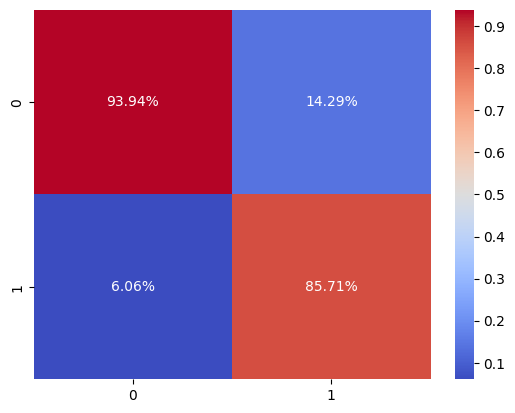

In [ ]:
%%time
parameters = {'C': np.linspace(0.001, 10, 100)}
grid_search = GridSearchCV(LR, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

LR.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
LR.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = LR.predict_proba(X_val)[0:,1]
y_pred = LR.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = LR.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

In [ ]:
S5_result = metrics

### **S5 (88% vs 12%) 2. Random Forest**

In [ ]:
%%time
RF = RandomForestClassifier(n_estimators = 4000, criterion = 'gini')

scores = cross_val_score(RF, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8627865961199292
CPU times: user 25min 39s, sys: 1.29 s, total: 25min 40s
Wall time: 25min 48s


In [ ]:
np.linspace(300, 1000, 29).astype(int)

array([ 300,  325,  350,  375,  400,  425,  450,  475,  500,  525,  550,
        575,  600,  625,  650,  675,  700,  725,  750,  775,  800,  825,
        850,  875,  900,  925,  950,  975, 1000])

Migliori parametri: {'n_estimators': 875}
ROC AUC: 0.8323682686740012
Accuracy: 0.9050279329608939
F1-score: 0.37037037037037035
Precision: 1.0
Recall: 0.22727272727272727
CPU times: user 2h 1min 58s, sys: 8.96 s, total: 2h 2min 7s
Wall time: 2h 2min 41s


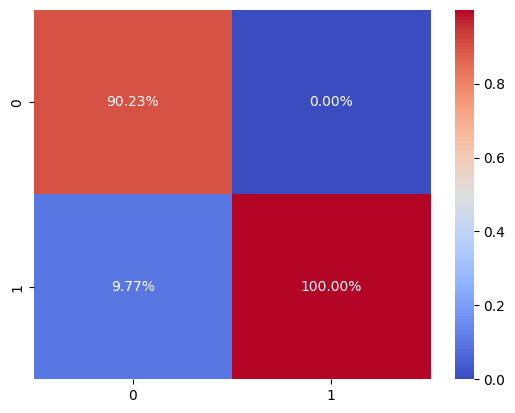

In [ ]:
%%time
parameters = {'n_estimators': np.linspace(300, 1000, 29).astype(int)}

grid_search = GridSearchCV(RF, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

RF.n_estimators = grid_search.best_params_['n_estimators']

# Addestro il modello con il miglior parametro
RF.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = RF.predict_proba(X_val)[0:,1]
y_pred = RF.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = RF.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / (float(np.sum(cf_matrix[:,j])) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

### **S5 (88% vs 12%) 3. Naive Bayes**

Il modello Naive Bayes prende come input solo dati positivi, pertanto è necessario traslare i dati come segue.

In [ ]:
s = np.zeros(1)
X_bayes = np.zeros(2808)

for i in range(pot.shape[0]):
  for j in range(pot.shape[1]):
    temp = np.array(pot[i,j])
    temp = (temp - np.mean(temp)) / np.std(temp)
    temp = temp - np.min(temp)

    s = np.append(s, temp)

  X_bayes = np.vstack((X_bayes, s[1:]))
  s = np.zeros(1)


X_bayes = X_bayes[1:,:]
y_bayes = df.condition.to_numpy()

In [ ]:
print(X_bayes.shape, y_bayes.shape)

(1115, 2808) (1115,)


In [ ]:
# Suddivisione del dataset in set di training e test
X_bayes_train, X_bayes_test, y_bayes_train, y_bayes_test = train_test_split(X_bayes, y_bayes, test_size = 0.2, random_state = 42, stratify = y_bayes)

# Suddivisione del dataset in set di training e validazione
X_bayes_train_original, X_bayes_val, y_bayes_train_original, y_bayes_val = train_test_split(X_bayes_train, y_bayes_train, test_size = 0.2, random_state = 42, stratify = y_bayes_train)

In [ ]:
X_bayes_train = X_bayes_train_original
y_bayes_train = y_bayes_train_original

#### *MultiNB*

In [ ]:
Multi_NB = MultinomialNB()

# Valutazione tramite validazione incrociata (cross-validation)
scores = cross_val_score(Multi_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC score medio (cross-validation):", mean_ROC)

ROC score medio (cross-validation): 0.8668906810035842


Migliori parametri: {'alpha': 14.80269126739504}
ROC AUC: 0.8034163288940359
Accuracy: 0.8491620111731844
F1-score: 0.4905660377358491
Precision: 0.41935483870967744
Recall: 0.5909090909090909
CPU times: user 1min 51s, sys: 55.5 s, total: 2min 46s
Wall time: 1min 40s


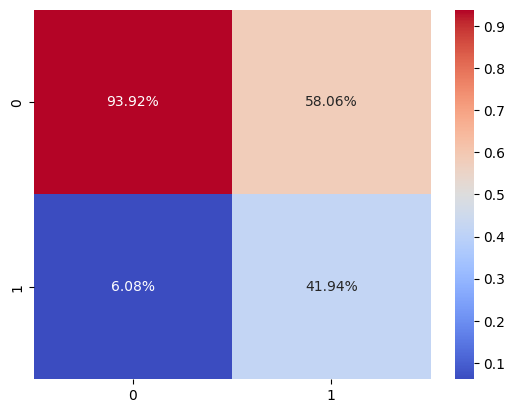

In [ ]:
%%time
# GridSearchCV
parameters = {'alpha': np.logspace(-8, 5, 500)}
grid_search = GridSearchCV(Multi_NB, parameters, cv = cv, scoring = 'roc_auc')

# grid search sul training set
grid_search.fit(X_bayes_train, y_bayes_train)

Multi_NB.alpha =  grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Multi_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Multi_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Multi_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Multi_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

#### *Complement NB*

In [ ]:
Compl_NB = ComplementNB()

# Cross-validation
scores = cross_val_score(Compl_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC Auc (cross-validation):", mean_ROC)

ROC Auc (cross-validation): 0.8668906810035842


Migliori parametri: {'alpha': 14.80269126739504}
ROC AUC: 0.8026925303995368
Accuracy: 0.8491620111731844
F1-score: 0.4905660377358491
Precision: 0.41935483870967744
Recall: 0.5909090909090909
CPU times: user 1min 51s, sys: 55.6 s, total: 2min 47s
Wall time: 1min 42s


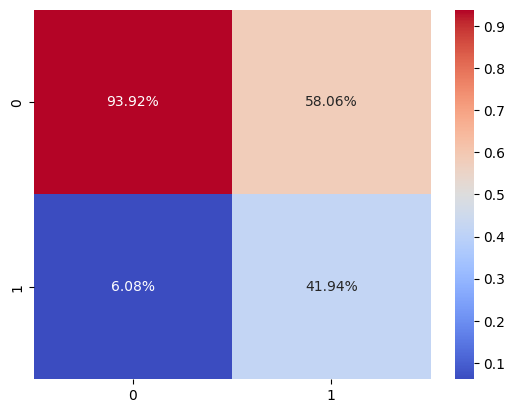

In [ ]:
%%time

parameters = {'alpha': np.logspace(-8, 5, 500)}
grid_search = GridSearchCV(Compl_NB, parameters, cv = cv, scoring = 'roc_auc')

grid_search.fit(X_bayes_train, y_bayes_train)

Compl_NB.alpha = grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Compl_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Compl_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Compl_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Compl_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

### **S5 (88% vs 12%) 4. SVM**

#### *Lineare*

In [ ]:
svm_linear = SVC(kernel = 'linear',class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_linear, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.930221311941742


In [ ]:
np.linspace(1e-4, 0.1, 10)

array([0.0001, 0.0112, 0.0223, 0.0334, 0.0445, 0.0556, 0.0667, 0.0778,
       0.0889, 0.1   ])

Migliori parametri: {'C': 0.0001}
ROC AUC: 0.910828025477707
Accuracy: 0.888268156424581
F1-score: 0.6
Precision: 0.5357142857142857
Recall: 0.6818181818181818
CPU times: user 16min 1s, sys: 1.78 s, total: 16min 2s
Wall time: 16min 14s


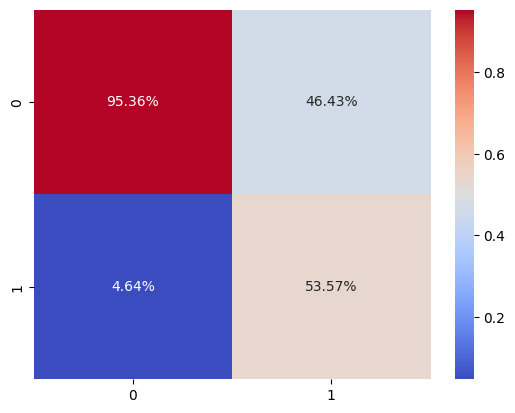

In [ ]:
%%time
parameters = {'C': np.linspace(1e-4, 10, 100)}

grid_search = GridSearchCV(svm_linear, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_linear.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
svm_linear.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_linear.predict_proba(X_val)[0:,1]
y_pred = svm_linear.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_linear.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

#### *Polinomiale*

In [ ]:
%%time
svm_poli = SVC(kernel = 'poly', probability = True)

scores = cross_val_score(svm_poli, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8753882915173238
CPU times: user 28 s, sys: 50.3 ms, total: 28 s
Wall time: 28.2 s


In [ ]:
np.linspace(0.01, 5, 20)

array([0.01      , 0.27263158, 0.53526316, 0.79789474, 1.06052632,
       1.32315789, 1.58578947, 1.84842105, 2.11105263, 2.37368421,
       2.63631579, 2.89894737, 3.16157895, 3.42421053, 3.68684211,
       3.94947368, 4.21210526, 4.47473684, 4.73736842, 5.        ])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Migliori parametri: {'C': 0.01, 'degree': 3}
ROC AUC: 0.8057324840764332
Accuracy: 0.8770949720670391
F1-score: 0.0
Precision: 0.0
Recall: 0.0
CPU times: user 26min 29s, sys: 1.88 s, total: 26min 31s
Wall time: 26min 36s


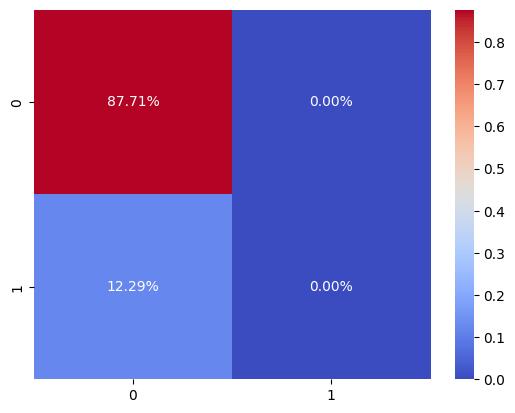

In [ ]:
%%time
parameters = {'degree': [2, 3, 4], 'C': np.linspace(0.01, 5, 20)}

grid_search = GridSearchCV(svm_poli, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_poli.C = grid_search.best_params_['C']
svm_poli.degree = grid_search.best_params_['degree']

# Addestro il modello con il miglior parametro
svm_poli.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_poli.predict_proba(X_val)[0:,1]
y_pred = svm_poli.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_poli.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])+ 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

#### *Radial Basis Function (RBF)*

In [ ]:
%%time
svm_rbf = SVC(kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_rbf, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9446030323718496
CPU times: user 26.2 s, sys: 41.6 ms, total: 26.3 s
Wall time: 26.3 s


Migliori parametri: {'C': 2.4210526315789473}
ROC AUC: 0.9319629415170817
Accuracy: 0.9217877094972067
F1-score: 0.5333333333333333
Precision: 1.0
Recall: 0.36363636363636365
CPU times: user 9min, sys: 685 ms, total: 9min 1s
Wall time: 9min 2s


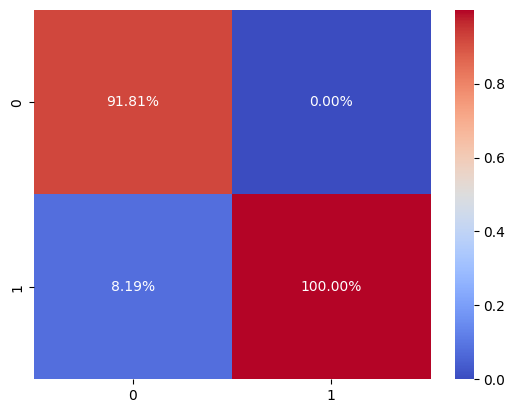

In [ ]:
%%time
parameters = {'C': np.linspace(1, 10, 20)}

grid_search = GridSearchCV(svm_rbf, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_rbf.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
svm_rbf.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_rbf.predict_proba(X_val)[0:,1]
y_pred = svm_rbf.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_rbf.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

### **S5 (88% vs 12%) 5. LDA**

In [ ]:
%%time
lda = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')

scores = cross_val_score(lda, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9288992717756159
CPU times: user 3min 32s, sys: 17.3 s, total: 3min 49s
Wall time: 2min 21s


In [ ]:
np.linspace(1e-8, 1, 5)

array([1.00000000e-08, 2.50000008e-01, 5.00000005e-01, 7.50000002e-01,
       1.00000000e+00])

Migliori parametri: {'shrinkage': 0.7777777800000001}
ROC AUC: 0.9664157498552404
Accuracy: 0.9329608938547486
F1-score: 0.7391304347826088
Precision: 0.7083333333333334
Recall: 0.7727272727272727
CPU times: user 32min 5s, sys: 2min 25s, total: 34min 30s
Wall time: 21min 10s


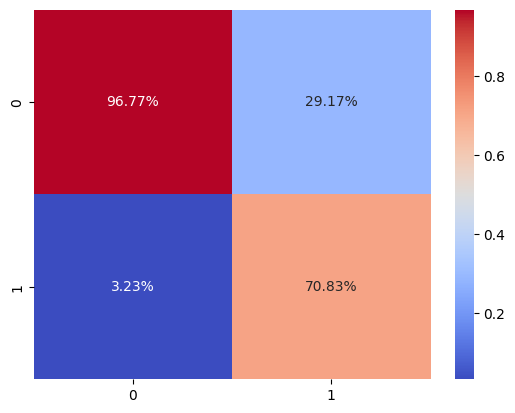

In [ ]:
%%time
parameters = {'shrinkage' : np.linspace(1e-8, 1, 10)}

grid_search = GridSearchCV(lda, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

lda.shrinkage = grid_search.best_params_['shrinkage']

# Addestro il modello con il miglior parametro
lda.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = lda.predict_proba(X_val)[0:,1]
y_pred = lda.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = lda.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

# Paziente S5 - dati unbalanced (70% vs 30%)

## Definizione dei Dataset

Suddivisione dei dati tra set di training, set di validazione e set di test e bilanciamento dei dati

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 30/70, random_state = 42)
X_train, y_train = undersampler.fit_resample(X_train_original, y_train_original)

class_counter = Counter(y_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  69.93243243243244 % e quella di T è 30.067567567567565 %. E in termini assoluti: Counter({0: 207, 1: 89})


## **Model selection**

### **S5 (70% vs 30%) 1. Logistic Regression**

In [ ]:
LR = LogisticRegression(max_iter = 1000)

scores = cross_val_score(LR, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC (cross-validation): ", ROC_mean)

ROC (cross-validation):  0.9189417989417988


Cerco i migliori parameti con Grid search

Migliori parametri: {'C': 0.001}
ROC AUC: 0.9009843659525189
Accuracy: 0.9050279329608939
F1-score: 0.5142857142857142
Precision: 0.6923076923076923
Recall: 0.4090909090909091
CPU times: user 2min 55s, sys: 1min 13s, total: 4min 8s
Wall time: 2min 33s


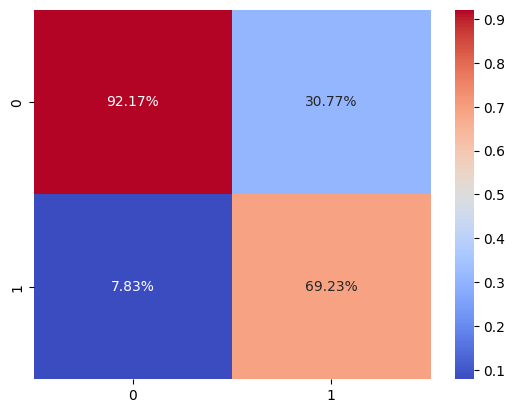

In [ ]:
%%time
parameters = {'C': np.linspace(0.001, 10, 100)}
grid_search = GridSearchCV(LR, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

LR.C = grid_search.best_params_['C']
LR.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = LR.predict_proba(X_val)[0:,1]
y_pred = LR.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = LR.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)
S5_result = np.vstack((S5_result, metrics))

### **S5 (70% vs 30%) 2. Random Forest**

In [ ]:
%%time
RF = RandomForestClassifier(criterion = 'gini')

scores = cross_val_score(RF, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9043121693121694
CPU times: user 8.26 s, sys: 24.1 ms, total: 8.28 s
Wall time: 8.28 s


Migliori parametri: {'n_estimators': 750}
ROC AUC: 0.8720324261725536
Accuracy: 0.8994413407821229
F1-score: 0.4375
Precision: 0.7
Recall: 0.3181818181818182
CPU times: user 28min 11s, sys: 3.64 s, total: 28min 14s
Wall time: 28min 25s


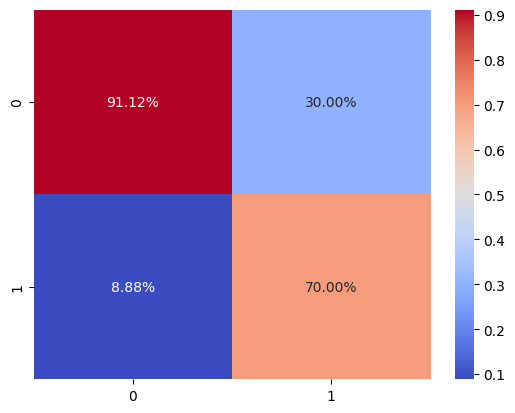

In [ ]:
%%time
parameters = {'n_estimators': np.linspace(300, 1000, 29).astype(int)}

grid_search = GridSearchCV(RF, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

RF.n_estimators = grid_search.best_params_['n_estimators']
RF.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = RF.predict_proba(X_val)[0:,1]
y_pred = RF.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = RF.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

### **S5 (70% vs 30%) 3. Naive Bayes**

Traslazione dei dati per rendere positivi i valori per il Naive Bayes

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 30/70, random_state = 42)
X_bayes_train, y_bayes_train = undersampler.fit_resample(X_bayes_train_original, y_bayes_train_original)

class_counter = Counter(y_bayes_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_bayes_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  69.93243243243244 % e quella di T è 30.067567567567565 %. E in termini assoluti: Counter({0: 207, 1: 89})


#### *MultiNB*

In [ ]:
%%time
Multi_NB = MultinomialNB()

# Valutazione tramite validazione incrociata (cross-validation)
scores = cross_val_score(Multi_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC score medio (cross-validation):", mean_ROC)

ROC score medio (cross-validation): 0.8358201058201058
CPU times: user 122 ms, sys: 29.2 ms, total: 151 ms
Wall time: 126 ms


Migliori parametri: {'alpha': 153.59346765108955}
ROC AUC: 0.765055008685582
Accuracy: 0.7206703910614525
F1-score: 0.375
Precision: 0.25862068965517243
Recall: 0.6818181818181818
CPU times: user 53.7 s, sys: 32.6 s, total: 1min 26s
Wall time: 54.5 s


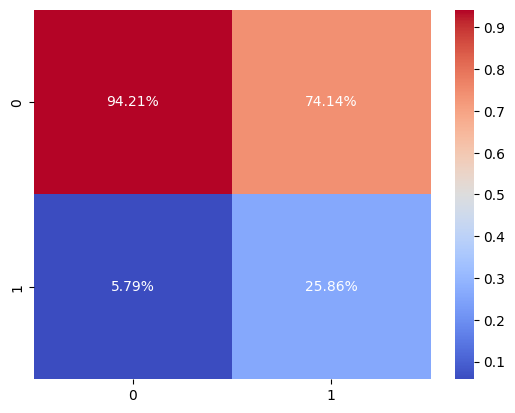

In [ ]:
%%time
Multi_NB = MultinomialNB()

# GridSearchCV
parameters = {'alpha': np.logspace(-8, 5, 500)}
grid_search = GridSearchCV(Multi_NB, parameters, cv = cv, scoring = 'roc_auc')

# grid search sul training set
grid_search.fit(X_bayes_train, y_bayes_train)

best_alpha_M = grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Multi_NB = MultinomialNB(alpha = best_alpha_M)
Multi_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Multi_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Multi_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Multi_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

#### *Complement NB*

In [ ]:
%%time
Compl_NB = ComplementNB()

# Cross-validation
scores = cross_val_score(Compl_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC Auc (cross-validation):", mean_ROC)

ROC Auc (cross-validation): 0.8360978835978836
CPU times: user 108 ms, sys: 62.9 ms, total: 171 ms
Wall time: 96.6 ms


Migliori parametri: {'alpha': 183.8776980082323}
ROC AUC: 0.764910248986682
Accuracy: 0.7039106145251397
F1-score: 0.3614457831325301
Precision: 0.2459016393442623
Recall: 0.6818181818181818
CPU times: user 54.3 s, sys: 32.9 s, total: 1min 27s
Wall time: 53.4 s


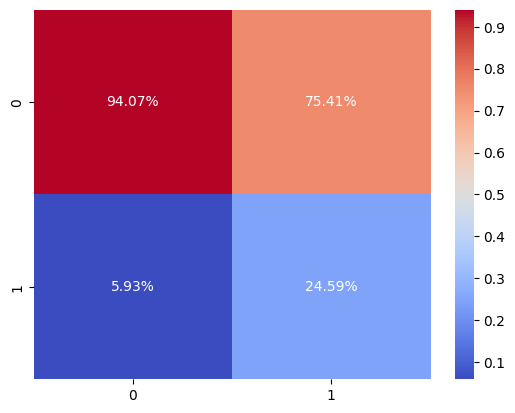

In [ ]:
%%time

parameters = {'alpha': np.logspace(-8, 5, 500)}
grid_search = GridSearchCV(Compl_NB, parameters, cv = cv, scoring = 'roc_auc')

grid_search.fit(X_bayes_train, y_bayes_train)

Compl_NB.alpha = grid_search.best_params_['alpha']
Compl_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Compl_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Compl_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Compl_NB.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

### **S5 (70% vs 30%) 4. SVM**

#### *Lineare*

In [ ]:
svm_linear = SVC(kernel = 'linear',class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_linear, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9118915343915344


Migliori parametri: {'C': 0.10110909090909091}
ROC AUC: 0.9290677475390852
Accuracy: 0.8994413407821229
F1-score: 0.6086956521739131
Precision: 0.5833333333333334
Recall: 0.6363636363636364
CPU times: user 5min 21s, sys: 451 ms, total: 5min 21s
Wall time: 5min 22s


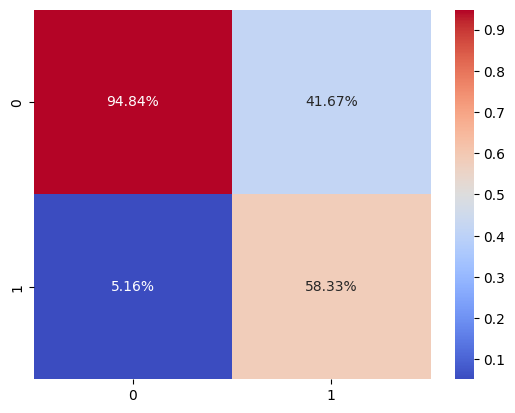

In [ ]:
%%time
parameters = {'C': np.linspace(1e-4, 10, 100)}

grid_search = GridSearchCV(svm_linear, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_linear.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
svm_linear.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_linear.predict_proba(X_val)[0:,1]
y_pred = svm_linear.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_linear.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

#### *Polinomiale*

In [ ]:
svm_poli = SVC(kernel = 'poly', probability = True)

scores = cross_val_score(svm_poli, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.831031746031746


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Migliori parametri: {'C': 0.01, 'degree': 3}
ROC AUC: 0.7947307469600463
Accuracy: 0.8770949720670391
F1-score: 0.0
Precision: 0.0
Recall: 0.0
CPU times: user 4min 11s, sys: 375 ms, total: 4min 11s
Wall time: 4min 12s


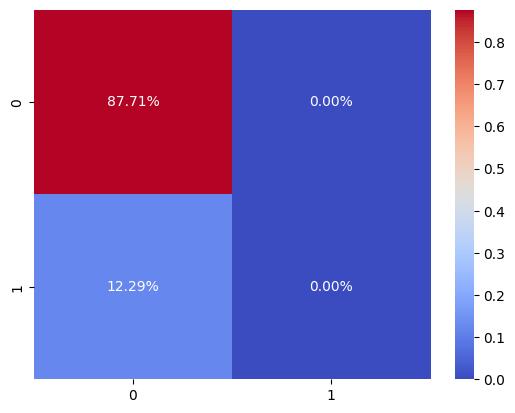

In [ ]:
%%time
parameters = {'degree': [2, 3, 4], 'C': np.linspace(0.01, 5, 20)}

grid_search = GridSearchCV(svm_poli, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_poli.C = grid_search.best_params_['C']
svm_poli.degree = grid_search.best_params_['degree']

# Addestro il modello con il miglior parametro
svm_poli.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_poli.predict_proba(X_val)[0:,1]
y_pred = svm_poli.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_poli.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

#### *Radial Basis Function (RBF)*

In [ ]:
svm_rbf = SVC(kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_rbf, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9171164021164021


Migliori parametri: {'C': 1.9473684210526314}
ROC AUC: 0.9137232194557036
Accuracy: 0.9329608938547486
F1-score: 0.6470588235294118
Precision: 0.9166666666666666
Recall: 0.5
CPU times: user 1min 41s, sys: 188 ms, total: 1min 41s
Wall time: 1min 42s


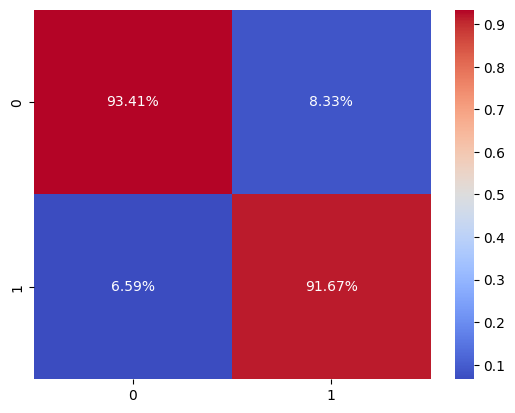

In [ ]:
%%time
parameters = {'C': np.linspace(1, 10, 20)}

grid_search = GridSearchCV(svm_rbf, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_rbf.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
svm_rbf.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_rbf.predict_proba(X_val)[0:,1]
y_pred = svm_rbf.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_rbf.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

### **S5 (70% vs 30%) 5. LDA**

In [ ]:
%%time
lda = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')

scores = cross_val_score(lda, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9256349206349206
CPU times: user 3min 20s, sys: 17.8 s, total: 3min 38s
Wall time: 2min 15s


In [ ]:
np.linspace(0.5, 1, 5)

array([0.5  , 0.625, 0.75 , 0.875, 1.   ])

Migliori parametri: {'shrinkage': 0.66666667}
ROC AUC: 0.944991314418066
Accuracy: 0.9162011173184358
F1-score: 0.7058823529411765
Precision: 0.6206896551724138
Recall: 0.8181818181818182
CPU times: user 31min 21s, sys: 2min 20s, total: 33min 41s
Wall time: 20min 32s


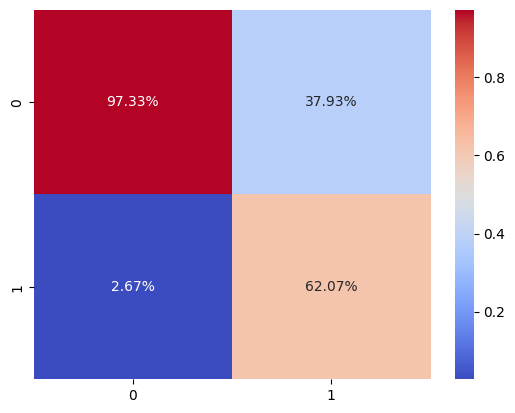

In [ ]:
%%time
parameters = {'shrinkage' : np.linspace(1e-8, 1, 10)}

grid_search = GridSearchCV(lda, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

lda.shrinkage = grid_search.best_params_['shrinkage']

# Addestro il modello con il miglior parametro
lda.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = lda.predict_proba(X_val)[0:,1]
y_pred = lda.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = lda.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

In [ ]:
S5_result.shape

(16, 5)

# Paziente S5 - dati unbalanced (60% vs 40%)

## Definizione dei Dataset

Suddivisione dei dati tra set di training, set di validazione e set di test e bilanciamento dei dati

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 40/60, random_state=42)
X_train, y_train = undersampler.fit_resample(X_train_original, y_train_original)

class_counter = Counter(y_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  59.909909909909906 % e quella di T è 40.090090090090094 %. E in termini assoluti: Counter({0: 133, 1: 89})


## **Model selection**

### **S5 (60% vs 40%) 1. Logistic Regression**

In [ ]:
%%time
LR = LogisticRegression(max_iter = 1000)

scores = cross_val_score(LR, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC (cross-validation): ", ROC_mean)

ROC (cross-validation):  0.9379197191697191
CPU times: user 1.17 s, sys: 537 ms, total: 1.71 s
Wall time: 932 ms


Cerco i migliori parameti con Grid search

Migliori parametri: {'C': 0.001}
ROC AUC: 0.8563983786913724
Accuracy: 0.8659217877094972
F1-score: 0.52
Precision: 0.4642857142857143
Recall: 0.5909090909090909
CPU times: user 1min 52s, sys: 52.5 s, total: 2min 45s
Wall time: 1min 40s


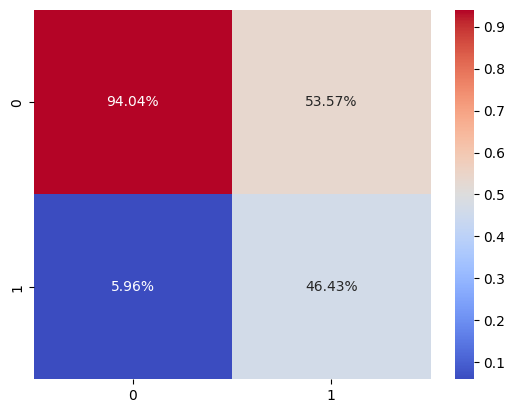

In [ ]:
%%time
parameters = {'C': np.linspace(0.001, 10, 100)}
grid_search = GridSearchCV(LR, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

LR.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
LR.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = LR.predict_proba(X_val)[0:,1]
y_pred = LR.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = LR.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)
S5_result = np.vstack((S5_result, metrics))

### **S5 (60% vs 40%) 2. Random Forest**

In [ ]:
%%time
RF = RandomForestClassifier(criterion = 'gini')

scores = cross_val_score(RF, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9071085164835164
CPU times: user 6.11 s, sys: 25.8 ms, total: 6.14 s
Wall time: 6.2 s


Migliori parametri: {'n_estimators': 375}
ROC AUC: 0.8435147654892877
Accuracy: 0.8324022346368715
F1-score: 0.4444444444444444
Precision: 0.375
Recall: 0.5454545454545454
CPU times: user 19min 1s, sys: 3.07 s, total: 19min 4s
Wall time: 19min 13s


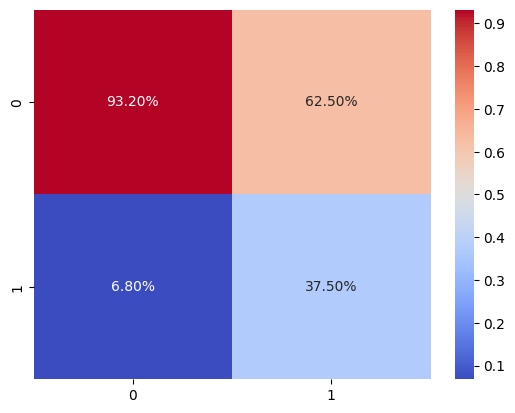

In [ ]:
%%time
parameters = {'n_estimators': np.linspace(300, 1000, 29).astype(int)}

grid_search = GridSearchCV(RF, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

RF.n_estimators = grid_search.best_params_['n_estimators']
RF.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = RF.predict_proba(X_val)[0:,1]
y_pred = RF.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = RF.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

### **S5 (60% vs 40%) 3. Naive Bayes**

Traslazione dei dati per rendere positivi i valori per il Naive Bayes

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 40/60, random_state = 42)
X_bayes_train, y_bayes_train = undersampler.fit_resample(X_bayes_train_original, y_bayes_train_original)

class_counter = Counter(y_bayes_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_bayes_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  59.909909909909906 % e quella di T è 40.090090090090094 %. E in termini assoluti: Counter({0: 133, 1: 89})


#### *MultiNB*

In [ ]:
%%time
Multi_NB = MultinomialNB()

# Valutazione tramite validazione incrociata (cross-validation)
scores = cross_val_score(Multi_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC score medio (cross-validation):", mean_ROC)

ROC score medio (cross-validation): 0.8637362637362637
CPU times: user 97.3 ms, sys: 58.8 ms, total: 156 ms
Wall time: 90.7 ms


Migliori parametri: {'alpha': 163.08906755493277}
ROC AUC: 0.7292993630573248
Accuracy: 0.659217877094972
F1-score: 0.32967032967032966
Precision: 0.21739130434782608
Recall: 0.6818181818181818
CPU times: user 49 s, sys: 29.5 s, total: 1min 18s
Wall time: 48.6 s


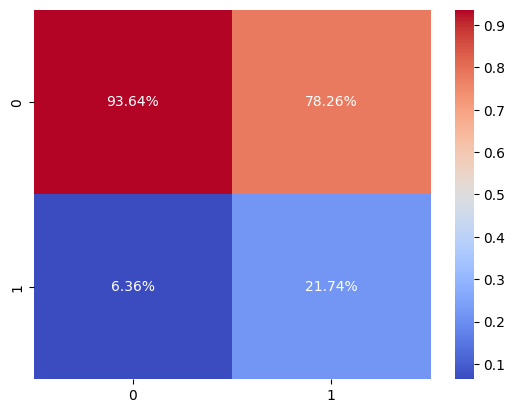

In [ ]:
%%time

# GridSearchCV
parameters = {'alpha': np.logspace(-8, 5, 500)}
grid_search = GridSearchCV(Multi_NB, parameters, cv = cv, scoring = 'roc_auc')

# grid search sul training set
grid_search.fit(X_bayes_train, y_bayes_train)

Multi_NB.alpha = grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Multi_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Multi_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Multi_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Multi_NB.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

#### *Complement NB*

In [ ]:
%%time
Compl_NB = ComplementNB()

# Cross-validation
scores = cross_val_score(Compl_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC Auc (cross-validation):", mean_ROC)

ROC Auc (cross-validation): 0.8641636141636141
CPU times: user 119 ms, sys: 89 ms, total: 208 ms
Wall time: 157 ms


Migliori parametri: {'alpha': 163.08906755493277}
ROC AUC: 0.7292993630573248
Accuracy: 0.6536312849162011
F1-score: 0.32608695652173914
Precision: 0.21428571428571427
Recall: 0.6818181818181818
CPU times: user 51.1 s, sys: 31.2 s, total: 1min 22s
Wall time: 51 s


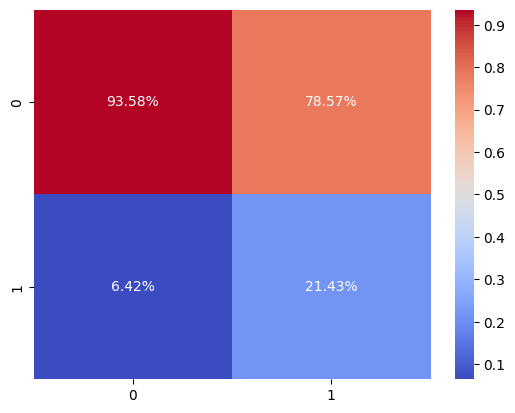

In [ ]:
%%time

parameters = {'alpha': np.logspace(-8, 5, 500)}
grid_search = GridSearchCV(Compl_NB, parameters, cv = cv, scoring = 'roc_auc')

grid_search.fit(X_bayes_train, y_bayes_train)

Compl_NB.alpha = grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Compl_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Compl_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Compl_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Compl_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

### **S5 (60% vs 40%) 4. SVM**

#### *Lineare*

In [ ]:
svm_linear = SVC(kernel = 'linear',class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_linear, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9361111111111111


In [ ]:
np.linspace(0.001, 0.02, 4)

array([0.001     , 0.00733333, 0.01366667, 0.02      ])

Migliori parametri: {'C': 0.10110909090909091}
ROC AUC: 0.8772437753329474
Accuracy: 0.8491620111731844
F1-score: 0.5423728813559323
Precision: 0.43243243243243246
Recall: 0.7272727272727273
CPU times: user 3min 28s, sys: 331 ms, total: 3min 29s
Wall time: 3min 29s


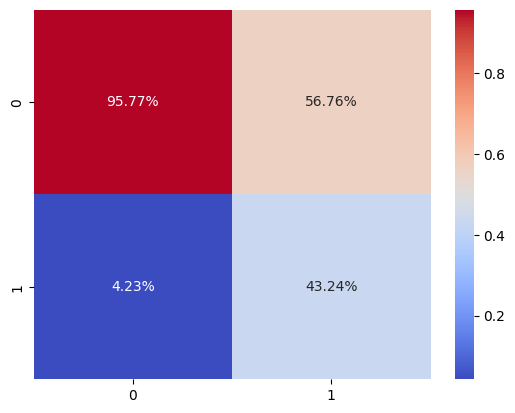

In [ ]:
%%time
parameters = {'C': np.linspace(1e-4, 10, 100)}

grid_search = GridSearchCV(svm_linear, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_linear.C = grid_search.best_params_['C']
svm_linear.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_linear.predict_proba(X_val)[0:,1]
y_pred = svm_linear.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_linear.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

#### *Polinomiale*

In [ ]:
svm_poli = SVC(kernel = 'poly', probability = True)

scores = cross_val_score(svm_poli, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8759462759462758


Migliori parametri: {'C': 1.3231578947368423, 'degree': 3}
ROC AUC: 0.7562246670526926
Accuracy: 0.8770949720670391
F1-score: 0.08333333333333334
Precision: 0.5
Recall: 0.045454545454545456
CPU times: user 2min 24s, sys: 275 ms, total: 2min 25s
Wall time: 2min 25s


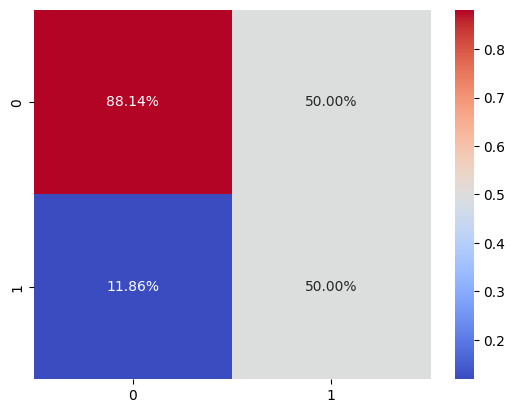

In [ ]:
%%time
parameters = {'degree': [2, 3, 4], 'C': np.linspace(0.01, 5, 20)}

grid_search = GridSearchCV(svm_poli, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_poli.C = grid_search.best_params_['C']
svm_poli.degree = grid_search.best_params_['degree']
svm_poli.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_poli.predict_proba(X_val)[0:,1]
y_pred = svm_poli.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_poli.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

#### *Radial Basis Function (RBF)*

In [ ]:

svm_rbf = SVC(kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_rbf, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9365079365079365


Migliori parametri: {'C': 1.9473684210526314}
ROC AUC: 0.8598726114649681
Accuracy: 0.8715083798882681
F1-score: 0.5306122448979591
Precision: 0.48148148148148145
Recall: 0.5909090909090909
CPU times: user 59.4 s, sys: 130 ms, total: 59.5 s
Wall time: 59.7 s


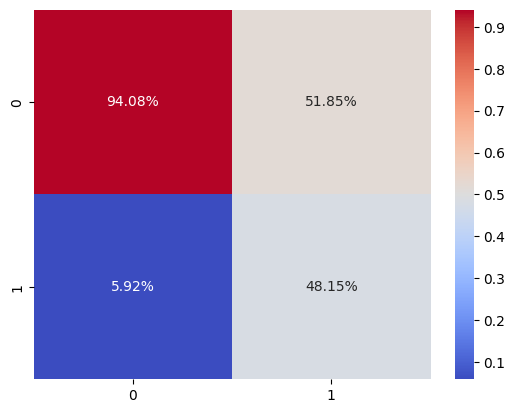

In [ ]:
%%time
parameters = {'C': np.linspace(1, 10, 20)}

grid_search = GridSearchCV(svm_rbf, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_rbf.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
svm_rbf.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_rbf.predict_proba(X_val)[0:,1]
y_pred = svm_rbf.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_rbf.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

### **S5 (60% vs 40%) 5. LDA**

In [ ]:
lda = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')

scores = cross_val_score(lda, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9395909645909646


In [ ]:
np.linspace(0.5, 1, 5)

array([0.5  , 0.625, 0.75 , 0.875, 1.   ])

Migliori parametri: {'shrinkage': 0.88888889}
ROC AUC: 0.8786913723219456
Accuracy: 0.8268156424581006
F1-score: 0.4918032786885246
Precision: 0.38461538461538464
Recall: 0.6818181818181818
CPU times: user 30min 25s, sys: 2min 16s, total: 32min 41s
Wall time: 19min 57s


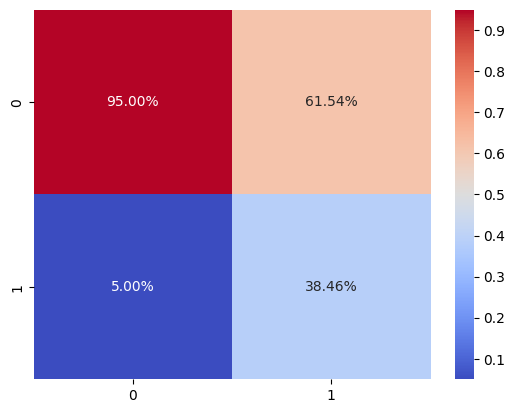

In [ ]:
%%time
parameters = {'shrinkage' : np.linspace(1e-8, 1, 10)}

grid_search = GridSearchCV(lda, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

lda.shrinkage = grid_search.best_params_['shrinkage']

# Addestro il modello con il miglior parametro
lda.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = lda.predict_proba(X_val)[0:,1]
y_pred = lda.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = lda.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

In [ ]:
S5_result.shape

(24, 5)

# Paziente S5 - dati unbalanced (50% vs 50%)

## Definizione dei Dataset

Suddivisione dei dati tra set di training, set di validazione e set di test e bilanciamento dei dati

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 1, random_state = 42)
X_train, y_train = undersampler.fit_resample(X_train_original, y_train_original)

class_counter = Counter(y_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  50.0 % e quella di T è 50.0 %. E in termini assoluti: Counter({0: 89, 1: 89})


## **Model selection**

### **S5 (50% vs 50%) 1. Logistic Regression**

In [ ]:
%%time

LR = LogisticRegression(max_iter = 1000)

scores = cross_val_score(LR, X_train, y_train, cv = cv, scoring = 'f1')
ROC_mean = scores.mean()

print("ROC (cross-validation): ", ROC_mean)

ROC (cross-validation):  0.8363295493636052
CPU times: user 883 ms, sys: 441 ms, total: 1.32 s
Wall time: 697 ms


Cerco i migliori parameti con Grid search

Migliori parametri: {'C': 0.001}
ROC AUC: 0.8485813549507817
Accuracy: 0.7932960893854749
F1-score: 0.4477611940298507
Precision: 0.3333333333333333
Recall: 0.6818181818181818
CPU times: user 1min 31s, sys: 46.4 s, total: 2min 17s
Wall time: 1min 24s


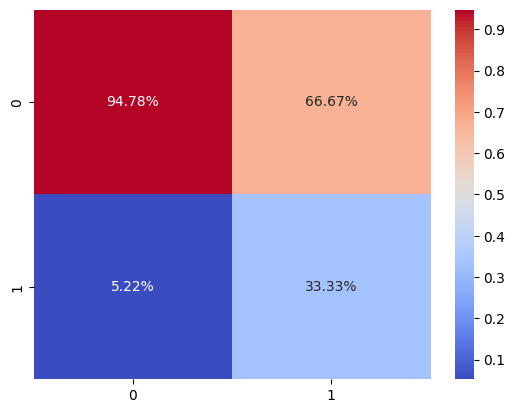

In [ ]:
%%time
parameters = {'C': np.linspace(0.001, 10, 100)}
grid_search = GridSearchCV(LR, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

LR.C = grid_search.best_params_['C']
LR.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = LR.predict_proba(X_val)[0:,1]
y_pred = LR.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = LR.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)
S5_result = np.vstack((S5_result, metrics))

### **S5 (50% vs 50%) 2. Random Forest**

In [ ]:
%%time
RF = RandomForestClassifier(criterion = 'gini')

scores = cross_val_score(RF, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8886574074074074
CPU times: user 4.31 s, sys: 11.2 ms, total: 4.32 s
Wall time: 4.32 s


Migliori parametri: {'n_estimators': 400}
ROC AUC: 0.8481470758540821
Accuracy: 0.7653631284916201
F1-score: 0.4166666666666667
Precision: 0.3
Recall: 0.6818181818181818
CPU times: user 14min 32s, sys: 2.31 s, total: 14min 34s
Wall time: 14min 42s


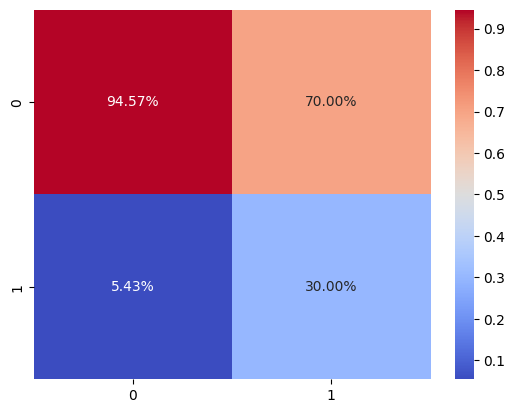

In [ ]:
%%time
parameters = {'n_estimators': np.linspace(300, 1000, 29).astype(int)}

grid_search = GridSearchCV(RF, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

RF.n_estimators = grid_search.best_params_['n_estimators']
RF.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = RF.predict_proba(X_val)[0:,1]
y_pred = RF.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = RF.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

### **S5 (50% vs 50%) 3. Naive Bayes**

Traslazione dei dati per rendere positivi i valori per il Naive Bayes

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 1, random_state = 42)
X_bayes_train, y_bayes_train = undersampler.fit_resample(X_bayes_train_original, y_bayes_train_original)

class_counter = Counter(y_bayes_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_bayes_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  50.0 % e quella di T è 50.0 %. E in termini assoluti: Counter({0: 89, 1: 89})


#### *MultiNB*

In [ ]:
Multi_NB = MultinomialNB()

# Valutazione tramite validazione incrociata (cross-validation)
scores = cross_val_score(Multi_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC score medio (cross-validation):", mean_ROC)

ROC score medio (cross-validation): 0.8442901234567902


Migliori parametri: {'alpha': 13.940828262825757}
ROC AUC: 0.7374059061957151
Accuracy: 0.7150837988826816
F1-score: 0.35443037974683544
Precision: 0.24561403508771928
Recall: 0.6363636363636364
CPU times: user 43.5 s, sys: 27.6 s, total: 1min 11s
Wall time: 41.2 s


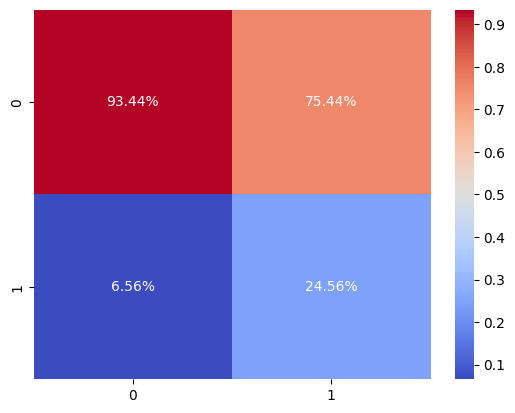

In [ ]:
%%time

# GridSearchCV
parameters = {'alpha': np.logspace(-8, 5, 500)}
grid_search = GridSearchCV(Multi_NB, parameters, cv = cv, scoring = 'roc_auc')

# grid search sul training set
grid_search.fit(X_bayes_train, y_bayes_train)

Multi_NB.alpha = grid_search.best_params_['alpha']
Multi_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Multi_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Multi_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Multi_NB.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

#### *Complement NB*

In [ ]:
%%time
Compl_NB = ComplementNB()

# Cross-validation
scores = cross_val_score(Compl_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC Auc (cross-validation):", mean_ROC)

ROC Auc (cross-validation): 0.8442901234567902
CPU times: user 80 ms, sys: 40.9 ms, total: 121 ms
Wall time: 68.9 ms


Migliori parametri: {'alpha': 13.940828262825757}
ROC AUC: 0.7374059061957151
Accuracy: 0.7150837988826816
F1-score: 0.35443037974683544
Precision: 0.24561403508771928
Recall: 0.6363636363636364
CPU times: user 41.2 s, sys: 25.9 s, total: 1min 7s
Wall time: 39 s


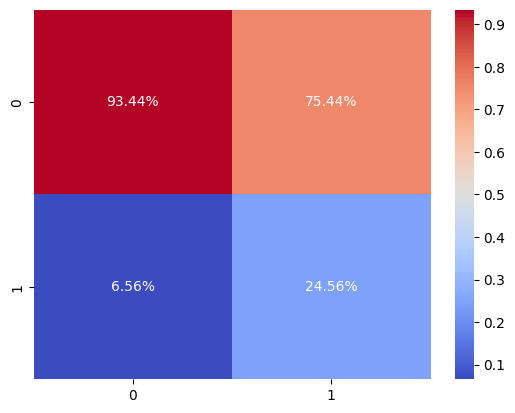

In [ ]:
%%time
parameters = {'alpha': np.logspace(-8, 5, 500)}
grid_search = GridSearchCV(Compl_NB, parameters, cv = cv, scoring = 'roc_auc')

grid_search.fit(X_bayes_train, y_bayes_train)

Compl_NB.alpha = grid_search.best_params_['alpha']
Compl_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Compl_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Compl_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Compl_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

### **S5 (50% vs 50%) 4. SVM**

#### *Lineare*

In [ ]:
svm_linear = SVC(kernel = 'linear',class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_linear, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.923148148148148


Migliori parametri: {'C': 0.10110909090909091}
ROC AUC: 0.8702953097857556
Accuracy: 0.8044692737430168
F1-score: 0.4776119402985074
Precision: 0.35555555555555557
Recall: 0.7272727272727273
CPU times: user 2min 21s, sys: 125 ms, total: 2min 21s
Wall time: 2min 22s


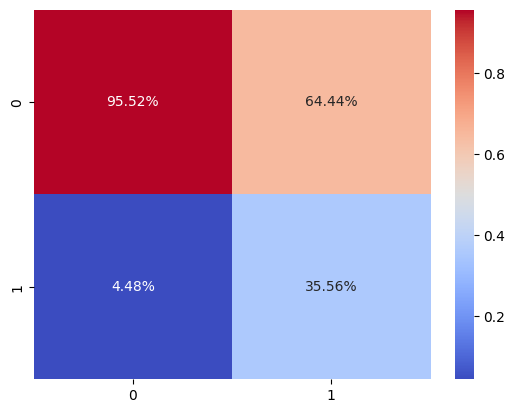

In [ ]:
%%time
parameters = {'C': np.linspace(1e-4, 10, 100)}

grid_search = GridSearchCV(svm_linear, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_linear.C = grid_search.best_params_['C']
svm_linear.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_linear.predict_proba(X_val)[0:,1]
y_pred = svm_linear.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_linear.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

#### *Polinomiale*

In [ ]:
svm_poli = SVC(kernel = 'poly', probability = True)

scores = cross_val_score(svm_poli, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.8342592592592594


Migliori parametri: {'C': 1.0605263157894738, 'degree': 3}
ROC AUC: 0.7388535031847134
Accuracy: 0.7597765363128491
F1-score: 0.39436619718309857
Precision: 0.2857142857142857
Recall: 0.6363636363636364
CPU times: user 1min 33s, sys: 99.3 ms, total: 1min 33s
Wall time: 1min 34s


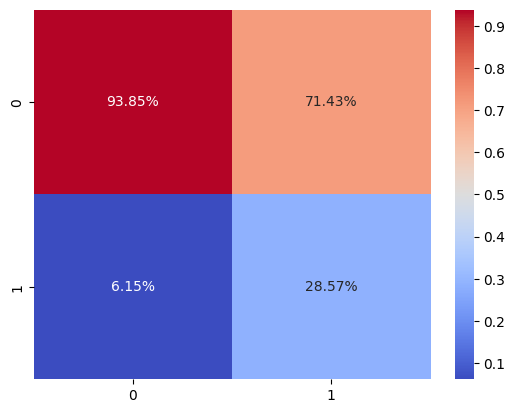

In [ ]:
%%time
parameters = {'degree': [2, 3, 4], 'C': np.linspace(0.01, 5, 20)}

grid_search = GridSearchCV(svm_poli, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_poli.C = grid_search.best_params_['C']
svm_poli.degree = grid_search.best_params_['degree']
svm_poli.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_poli.predict_proba(X_val)[0:,1]
y_pred = svm_poli.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_poli.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

#### *Radial Basis Function (RBF)*

In [ ]:
svm_rbf = SVC(kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_rbf, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9243827160493827


Migliori parametri: {'C': 2.4210526315789473}
ROC AUC: 0.8537927041111755
Accuracy: 0.8156424581005587
F1-score: 0.47619047619047616
Precision: 0.36585365853658536
Recall: 0.6818181818181818
CPU times: user 38.5 s, sys: 82.7 ms, total: 38.6 s
Wall time: 38.7 s


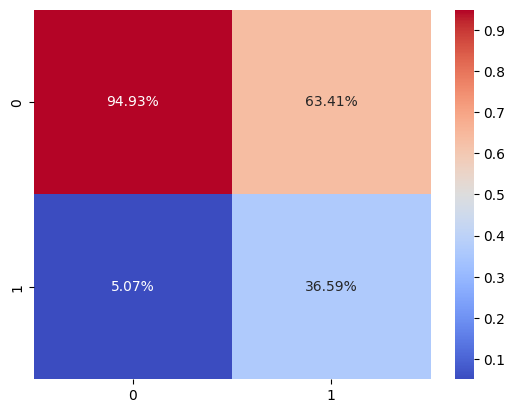

In [ ]:
%%time
parameters = {'C': np.linspace(1, 10, 20)}

grid_search = GridSearchCV(svm_rbf, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_rbf.C = grid_search.best_params_['C']
svm_rbf.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_rbf.predict_proba(X_val)[0:,1]
y_pred = svm_rbf.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_rbf.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

### **S5 (50% vs 50%) 5. LDA**

In [ ]:
lda = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')

scores = cross_val_score(lda, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9273148148148149


In [ ]:
np.linspace(0.4, 1, 5)

array([0.4 , 0.55, 0.7 , 0.85, 1.  ])

Migliori parametri: {'shrinkage': 0.88888889}
ROC AUC: 0.8656629994209613
Accuracy: 0.7932960893854749
F1-score: 0.4477611940298507
Precision: 0.3333333333333333
Recall: 0.6818181818181818
CPU times: user 31min 45s, sys: 2min 23s, total: 34min 9s
Wall time: 20min 14s


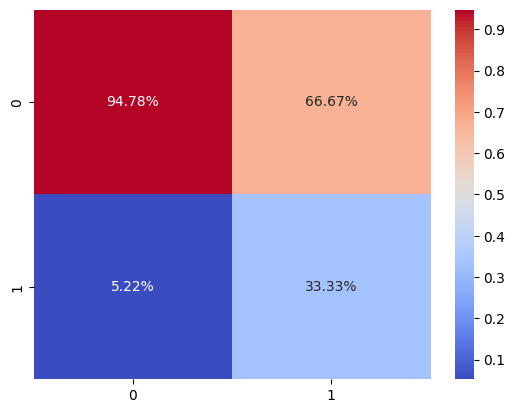

In [ ]:
%%time
parameters = {'shrinkage' : np.linspace(1e-8, 1, 10)}

grid_search = GridSearchCV(lda, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

lda.shrinkage = grid_search.best_params_['shrinkage']
lda.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = lda.predict_proba(X_val)[0:,1]
y_pred = lda.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = lda.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S5_result = np.vstack((S5_result, metrics))

In [ ]:
S5_result.shape

(32, 5)

# Salvataggio risultati per il paziente

In [ ]:
path_data = '/content/drive/MyDrive/Colab Notebooks/data/DataMiningProject/Results'
file_path = os.path.join(path_mount, path_data, subject)
np.save(file_path + "_results", S5_result)
print(file_path)

/content/drive/MyDrive/Colab Notebooks/data/DataMiningProject/Results/S5
